## ENSG00000168488 
### ATXN2L

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
FILE_ROOT = '/storage/dana/spliceSTR/expression/'

In [15]:
gene = 'ENSG00000168488.14'

---
# Percent Spliced In (PSI) calculations
---

In [3]:
exon_df = pd.read_table(FILE_ROOT + 'GTEx_Data_20150112_RNAseq_RNASeQCv1.1.8_exon_reads.lung.txt',index_col=0)

In [12]:
gene_df = exon_df.loc[exon_df.index.str.startswith(gene)]
exons = list(gene_df.index)
exons.sort()
gene_df

,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0626-SM-5N9CS,GTEX-14DAR-0226-SM-5S2PR,GTEX-139T6-0426-SM-5IJEM,GTEX-111CU-0326-SM-5GZXO,GTEX-YFC4-1126-SM-5RQJN,GTEX-TML8-0326-SM-4GICN,GTEX-111FC-1126-SM-5GZWU,GTEX-14E7W-1326-SM-5RQIV,...,GTEX-T5JC-0826-SM-32PMC,GTEX-YEC3-0226-SM-5IFJO,GTEX-1399S-1726-SM-5L3DI,GTEX-YEC4-0526-SM-4W21U,GTEX-T6MN-0826-SM-32PM4,GTEX-1399U-0826-SM-5KM1P,GTEX-T6MO-0426-SM-32QOI,GTEX-YECK-0926-SM-4W214,GTEX-T8EM-0326-SM-3DB7F,GTEX-YF7O-0626-SM-4W21R
Id,,,,,,,,,,,,,,,,,,,,,
ENSG00000168488.14_0,131.54,129.84,210.30,278.92,218.38,269.25,109.66,250.07,67.45,204.08,...,151.87,249.88,209.24,63.08,95.41,270.28,66.64,184.18,128.79,97.49
ENSG00000168488.14_1,23.92,14.60,22.50,35.84,76.47,52.25,21.50,45.55,28.53,27.66,...,55.12,68.88,38.42,28.38,21.33,50.15,50.28,20.30,46.18,24.37
ENSG00000168488.14_10,202.25,72.72,223.54,303.30,352.75,262.41,186.00,325.82,152.68,257.54,...,477.82,393.09,244.97,353.33,256.28,339.70,378.04,346.91,513.57,268.36
ENSG00000168488.14_11,425.67,205.67,438.00,577.05,656.33,665.17,431.57,658.13,320.79,549.33,...,828.26,632.46,460.12,681.92,510.11,654.75,590.59,733.05,991.95,529.16
ENSG00000168488.14_12,269.59,59.12,266.54,335.47,373.04,343.70,230.83,450.79,213.58,313.21,...,540.60,377.43,294.24,437.07,321.21,387.29,394.03,444.82,674.97,384.64
ENSG00000168488.14_13,164.43,57.49,195.74,206.54,258.76,246.93,179.80,300.74,153.32,197.40,...,387.22,266.09,200.35,319.33,222.92,258.34,314.87,307.41,488.74,249.24
ENSG00000168488.14_14,705.43,217.70,784.18,825.24,1192.30,1013.63,722.35,1031.53,584.40,853.97,...,1486.95,1061.82,837.30,1238.40,929.33,1072.16,1103.47,1210.34,1573.96,1037.66
ENSG00000168488.14_15,234.45,72.16,292.24,256.37,375.47,338.14,207.42,446.41,216.33,291.86,...,564.32,367.87,267.71,597.59,382.08,404.37,411.92,503.11,633.88,413.33
ENSG00000168488.14_16,372.22,155.46,457.33,448.29,672.72,543.26,347.88,680.68,328.34,437.29,...,840.03,598.54,469.25,998.54,619.53,621.83,589.58,746.79,832.61,679.07


In [4]:
junction_df = pd.read_table(FILE_ROOT + 'GTEx_Data_20150112_RNAseq_Flux1.6_junction_reads.lung.txt',
                              index_col=0,
                              sep='\t',
                              skipinitialspace=True)

/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
junction_df

,Gene_Symbol,Chr,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-0326-SM-5GZXO,GTEX-111FC-1126-SM-5GZWU,GTEX-111VG-0726-SM-5GIDC,GTEX-111YS-0626-SM-5GZXV,GTEX-1122O-0126-SM-5GICA,GTEX-1128S-0726-SM-5N9D6,GTEX-117YW-0526-SM-5H11C,...,GTEX-ZXG5-0826-SM-5GID6,GTEX-ZY6K-0326-SM-5SIBB,GTEX-ZYFG-0226-SM-5GIDT,GTEX-ZYT6-0526-SM-5GIEA,GTEX-ZYVF-1726-SM-5E443,GTEX-ZYW4-1526-SM-5SIBA,GTEX-ZYWO-0826-SM-5E45W,GTEX-ZYY3-0926-SM-5E454,GTEX-ZZPT-1326-SM-5E43H,GTEX-ZZPU-0526-SM-5E44U
TargetID,,,,,,,,,,,,,,,,,,,,,
10_100008748_100010822,ENSG00000138131.3,10,38.0,7.0,10.0,22.0,11.0,21.0,11.0,15.0,...,15.0,6.0,8.0,31.0,9.0,19.0,6.0,13.0,34.0,10.0
10_100010933_100011323,ENSG00000138131.3,10,32.0,9.0,19.0,19.0,6.0,6.0,9.0,10.0,...,14.0,7.0,11.0,18.0,13.0,21.0,6.0,14.0,33.0,10.0
10_100011459_100012110,ENSG00000138131.3,10,36.0,8.0,11.0,10.0,10.0,8.0,2.0,5.0,...,16.0,7.0,18.0,14.0,18.0,17.0,4.0,14.0,29.0,10.0
10_100011959_100015345,ENSG00000230928.1,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10_100012225_100013310,ENSG00000138131.3,10,41.0,8.0,19.0,12.0,14.0,14.0,11.0,8.0,...,16.0,5.0,13.0,26.0,13.0,17.0,6.0,20.0,25.0,18.0
10_100013553_100015334,ENSG00000138131.3,10,21.0,3.0,13.0,10.0,8.0,6.0,5.0,6.0,...,15.0,4.0,11.0,10.0,5.0,13.0,2.0,15.0,23.0,6.0
10_100015496_100016537,ENSG00000138131.3,10,27.0,6.0,12.0,7.0,21.0,3.0,10.0,10.0,...,13.0,4.0,6.0,15.0,7.0,6.0,2.0,14.0,18.0,10.0
10_100016704_100017407,ENSG00000138131.3,10,20.0,5.0,17.0,11.0,8.0,7.0,2.0,9.0,...,14.0,1.0,5.0,16.0,7.0,11.0,3.0,7.0,23.0,13.0
10_100017561_100017738,ENSG00000138131.3,10,15.0,7.0,11.0,18.0,6.0,8.0,7.0,5.0,...,14.0,0.0,4.0,10.0,6.0,11.0,4.0,7.0,14.0,5.0


In [20]:
intersect = list(exon_df.columns.intersection(junction_df.columns[2:]))
exon_df[intersect]

,GTEX-1117F-0226-SM-5GZZ7,GTEX-14DAR-0226-SM-5S2PR,GTEX-139T6-0426-SM-5IJEM,GTEX-111CU-0326-SM-5GZXO,GTEX-YFC4-1126-SM-5RQJN,GTEX-TML8-0326-SM-4GICN,GTEX-111FC-1126-SM-5GZWU,GTEX-14E7W-1326-SM-5RQIV,GTEX-YFCO-0426-SM-4W1Z7,GTEX-111VG-0726-SM-5GIDC,...,GTEX-T5JC-0826-SM-32PMC,GTEX-YEC3-0226-SM-5IFJO,GTEX-1399S-1726-SM-5L3DI,GTEX-YEC4-0526-SM-4W21U,GTEX-T6MN-0826-SM-32PM4,GTEX-1399U-0826-SM-5KM1P,GTEX-T6MO-0426-SM-32QOI,GTEX-YECK-0926-SM-4W214,GTEX-T8EM-0326-SM-3DB7F,GTEX-YF7O-0626-SM-4W21R
Id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.10_0,1106.46,311.13,714.91,615.25,447.13,572.84,685.09,416.03,824.47,969.75,...,334.25,545.45,546.72,1526.91,376.76,1320.45,545.68,1341.22,1290.25,714.58
ENSG00000000003.10_1,163.18,51.46,99.61,82.91,66.91,71.76,89.20,65.61,107.92,139.32,...,59.63,65.83,88.91,207.00,71.99,171.38,82.34,157.10,213.82,91.29
ENSG00000000003.10_2,97.53,31.09,66.18,57.99,33.60,56.68,82.93,29.96,72.58,70.86,...,32.20,49.58,47.65,155.18,34.62,118.91,56.85,93.80,128.38,65.42
ENSG00000000003.10_3,167.22,52.74,101.53,114.87,81.32,92.80,118.80,59.82,128.96,139.80,...,36.87,100.39,107.04,198.51,49.99,177.15,70.01,162.97,239.04,100.30
ENSG00000000003.10_4,121.17,37.30,89.53,82.84,56.10,55.20,88.93,44.68,93.78,88.93,...,33.87,71.11,66.92,139.74,41.53,119.59,67.30,119.42,156.12,86.70
ENSG00000000003.10_5,100.76,35.37,59.58,52.51,46.30,41.49,66.59,39.10,79.39,59.87,...,26.46,42.95,45.35,92.67,29.99,94.55,51.08,82.61,109.64,53.10
ENSG00000000003.10_6,176.34,45.67,120.24,93.99,85.12,92.11,85.01,59.80,129.34,115.70,...,47.43,82.95,86.24,138.91,54.35,163.04,85.29,128.90,214.40,112.92
ENSG00000000003.10_7,206.33,49.24,154.43,100.64,63.51,90.12,83.43,51.00,109.55,103.78,...,32.29,128.75,118.17,147.79,63.78,185.62,72.43,178.97,148.35,115.68
ENSG00000000003.10_8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [18]:
intersect[:0] = ['Gene_Symbol','Chr']
junction_df[intersect]

,Gene_Symbol,Chr,GTEX-1117F-0226-SM-5GZZ7,GTEX-14DAR-0226-SM-5S2PR,GTEX-139T6-0426-SM-5IJEM,GTEX-111CU-0326-SM-5GZXO,GTEX-YFC4-1126-SM-5RQJN,GTEX-TML8-0326-SM-4GICN,GTEX-111FC-1126-SM-5GZWU,GTEX-14E7W-1326-SM-5RQIV,...,GTEX-T5JC-0826-SM-32PMC,GTEX-YEC3-0226-SM-5IFJO,GTEX-1399S-1726-SM-5L3DI,GTEX-YEC4-0526-SM-4W21U,GTEX-T6MN-0826-SM-32PM4,GTEX-1399U-0826-SM-5KM1P,GTEX-T6MO-0426-SM-32QOI,GTEX-YECK-0926-SM-4W214,GTEX-T8EM-0326-SM-3DB7F,GTEX-YF7O-0626-SM-4W21R
TargetID,,,,,,,,,,,,,,,,,,,,,
10_100008748_100010822,ENSG00000138131.3,10,38.0,17.0,35.0,7.0,6.0,25.0,10.0,11.0,...,18.0,17.0,17.0,26.0,11.0,19.0,10.0,22.0,35.0,11.0
10_100010933_100011323,ENSG00000138131.3,10,32.0,9.0,19.0,9.0,13.0,21.0,19.0,18.0,...,20.0,13.0,12.0,26.0,11.0,13.0,22.0,14.0,33.0,21.0
10_100011459_100012110,ENSG00000138131.3,10,36.0,13.0,20.0,8.0,15.0,27.0,11.0,7.0,...,19.0,13.0,16.0,16.0,15.0,14.0,30.0,14.0,26.0,12.0
10_100011959_100015345,ENSG00000230928.1,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10_100012225_100013310,ENSG00000138131.3,10,41.0,12.0,30.0,8.0,13.0,20.0,19.0,9.0,...,15.0,18.0,15.0,21.0,7.0,25.0,21.0,14.0,21.0,12.0
10_100013553_100015334,ENSG00000138131.3,10,21.0,14.0,24.0,3.0,9.0,10.0,13.0,5.0,...,6.0,6.0,5.0,15.0,4.0,10.0,21.0,18.0,7.0,7.0
10_100015496_100016537,ENSG00000138131.3,10,27.0,15.0,25.0,6.0,7.0,14.0,12.0,7.0,...,8.0,12.0,9.0,9.0,9.0,18.0,20.0,10.0,16.0,7.0
10_100016704_100017407,ENSG00000138131.3,10,20.0,19.0,23.0,5.0,9.0,22.0,17.0,4.0,...,6.0,13.0,7.0,6.0,3.0,9.0,5.0,6.0,6.0,8.0
10_100017561_100017738,ENSG00000138131.3,10,15.0,8.0,26.0,7.0,5.0,15.0,11.0,6.0,...,8.0,8.0,6.0,2.0,1.0,4.0,1.0,7.0,4.0,10.0


In [17]:
gene_junction_df = junction_df[junction_df['Gene_Symbol'] == gene]
gene_junction_df

,Gene_Symbol,Chr,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-0326-SM-5GZXO,GTEX-111FC-1126-SM-5GZWU,GTEX-111VG-0726-SM-5GIDC,GTEX-111YS-0626-SM-5GZXV,GTEX-1122O-0126-SM-5GICA,GTEX-1128S-0726-SM-5N9D6,GTEX-117YW-0526-SM-5H11C,...,GTEX-ZXG5-0826-SM-5GID6,GTEX-ZY6K-0326-SM-5SIBB,GTEX-ZYFG-0226-SM-5GIDT,GTEX-ZYT6-0526-SM-5GIEA,GTEX-ZYVF-1726-SM-5E443,GTEX-ZYW4-1526-SM-5SIBA,GTEX-ZYWO-0826-SM-5E45W,GTEX-ZYY3-0926-SM-5E454,GTEX-ZZPT-1326-SM-5E43H,GTEX-ZZPU-0526-SM-5E44U
TargetID,,,,,,,,,,,,,,,,,,,,,
16_28834879_28836687,ENSG00000168488.14,16,52.0,68.0,31.0,91.0,70.0,47.0,100.0,76.0,...,60.0,87.0,46.0,66.0,81.0,72.0,98.0,101.0,74.0,62.0
16_28835863_28836687,ENSG00000168488.14,16,7.0,10.0,8.0,7.0,13.0,15.0,14.0,13.0,...,20.0,36.0,7.0,12.0,17.0,15.0,20.0,11.0,12.0,7.0
16_28835982_28836687,ENSG00000168488.14,16,1.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,...,2.0,3.0,0.0,3.0,1.0,3.0,3.0,1.0,1.0,0.0
16_28836723_28836945,ENSG00000168488.14,16,91.0,131.0,55.0,163.0,126.0,85.0,153.0,100.0,...,95.0,150.0,91.0,130.0,144.0,133.0,177.0,148.0,108.0,104.0
16_28837001_28837091,ENSG00000168488.14,16,111.0,162.0,73.0,140.0,136.0,105.0,175.0,109.0,...,93.0,172.0,89.0,150.0,152.0,147.0,172.0,155.0,151.0,118.0
16_28837162_28837561,ENSG00000168488.14,16,151.0,221.0,117.0,243.0,193.0,157.0,269.0,174.0,...,165.0,239.0,113.0,212.0,246.0,223.0,233.0,240.0,225.0,200.0
16_28837711_28838183,ENSG00000168488.14,16,123.0,243.0,115.0,230.0,195.0,136.0,243.0,174.0,...,182.0,292.0,141.0,251.0,240.0,222.0,302.0,191.0,230.0,169.0
16_28838244_28840722,ENSG00000168488.14,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16_28838244_28841190,ENSG00000168488.14,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
annotations = pd.read_csv('/storage/dana/spliceSTR/expression/gencode.v19.annotations_exons.csv',index_col=0)
gene_annotations = annotations[annotations['gene.id'] == gene].sort_values(by='probe.start')

In [19]:
gene_annotations.index = gene_annotations['probe.id']
gene_annotations

,gene.chr,gene.start,gene.stop,gene.id,gene.strand,probe.chr,probe.start,probe.stop,probe.id,probe.strand
probe.id,,,,,,,,,,
ENSG00000168488.14_0,chr16,28834369,28848558,ENSG00000168488.14,+,chr16,28834369,28834879,ENSG00000168488.14_0,+
ENSG00000168488.14_1,chr16,28834369,28848558,ENSG00000168488.14,+,chr16,28835459,28835982,ENSG00000168488.14_1,+
ENSG00000168488.14_2,chr16,28834369,28848558,ENSG00000168488.14,+,chr16,28836687,28836723,ENSG00000168488.14_2,+
ENSG00000168488.14_3,chr16,28834369,28848558,ENSG00000168488.14,+,chr16,28836945,28837001,ENSG00000168488.14_3,+
ENSG00000168488.14_4,chr16,28834369,28848558,ENSG00000168488.14,+,chr16,28837091,28837162,ENSG00000168488.14_4,+
ENSG00000168488.14_5,chr16,28834369,28848558,ENSG00000168488.14,+,chr16,28837561,28837711,ENSG00000168488.14_5,+
ENSG00000168488.14_6,chr16,28834369,28848558,ENSG00000168488.14,+,chr16,28838183,28838307,ENSG00000168488.14_6,+
ENSG00000168488.14_7,chr16,28834369,28848558,ENSG00000168488.14,+,chr16,28840722,28840813,ENSG00000168488.14_7,+
ENSG00000168488.14_8,chr16,28834369,28848558,ENSG00000168488.14,+,chr16,28841179,28841379,ENSG00000168488.14_8,+


In [22]:
read_len = 75*2

PSI_df = pd.DataFrame(index = exon_df.columns, columns = exons)
coverage_df = pd.DataFrame(index = exon_df.columns, columns = exons)
exon_too_few_reads = []
min_reads = 10

for exon in exons:
    print()
    exon_chrom = gene_annotations.loc[exon]['probe.chr'].split('chr')[1]
    exon_start = gene_annotations.loc[exon]['probe.start']
    exon_stop = gene_annotations.loc[exon]['probe.stop']
    exon_len = math.fabs(exon_start - exon_stop) + 1
    print('EXON: {}'.format(exon))
    print('START: {}'.format(exon_start))
    print('STOP : {}'.format(exon_stop))
    print('length : {}'.format(exon_len))
    print()
    B_intervals = []
    C_intervals = []
    for interval in gene_junction_df.index:
        chrom,start,stop = interval.split('_')
        if chrom != exon_chrom:
            print(chrom)
            print(exon_chrom)
            print('Chromosomes aren\'t matching, something is wrong!!')
        # C
        if int(start) < exon_start and int(stop) > exon_stop: # check on strand orientation
            print('C')
            print(interval)
            C_intervals.append(interval)
        #B1
        if int(start) < exon_start and (int(stop) >= exon_start and int(stop) <= exon_stop):
            print('B1')
            print(interval)
            B_intervals.append(interval)
        #B2
        if (int(start) >= exon_start and int(start) <= exon_stop) and int(stop) > exon_stop:
            print('B2')
            print(interval)
            B_intervals.append(interval)
        
    A_reads = exon_df.loc[exon]

    B_reads = gene_junction_df.loc[B_intervals]
    B_reads = B_reads.iloc[:,2:].sum()

    C_reads = gene_junction_df.loc[C_intervals]
    C_reads = C_reads.iloc[:,2:].sum()

    total_reads = A_reads + B_reads + C_reads 
    samples_low_reads = len(total_reads[total_reads < min_reads])
    if samples_low_reads/len(total_reads) > 0.2:
        exon_too_few_reads.append(exon)
    coverage_df[exon] = total_reads
    
    print(exon_too_few_reads)
    
#     if exon == 'ENSG00000114416.13_0':
#         print('A reads: {}'.format(A_reads))
#         print('B reads: {}'.format(B_reads))
#         print('C reads: {}'.format(C_reads))
    A_B_norm = (A_reads + B_reads)/(exon_len-1)
    C_norm = C_reads/(read_len)

    mask = (A_B_norm == 0) & (C_norm == 0)
    PSI_norm = 100*((A_B_norm)/(A_B_norm + C_norm)) if (A_B_norm.sum() + C_norm.sum()) > 0.00 else 0
    PSI_norm = PSI_norm.where(~mask,0)
    PSI_df[exon] = PSI_norm



EXON: ENSG00000168488.14_0
START: 28834369
STOP : 28834879
length : 511.0

B2
16_28834879_28836687
[]

EXON: ENSG00000168488.14_1
START: 28835459
STOP : 28835982
length : 524.0

C
16_28834879_28836687
B2
16_28835863_28836687
B2
16_28835982_28836687
[]

EXON: ENSG00000168488.14_10
START: 28842283
STOP : 28842393
length : 111.0

B1
16_28842111_28842283
B1
16_28842111_28842306
C
16_28842111_28843817
B2
16_28842393_28843508
B2
16_28842393_28843526
[]

EXON: ENSG00000168488.14_11
START: 28843508
STOP : 28843720
length : 213.0

C
16_28842111_28843817
B1
16_28842393_28843508
B1
16_28842393_28843526
B2
16_28843720_28843817
[]

EXON: ENSG00000168488.14_12
START: 28843817
STOP : 28843888
length : 72.0

B1
16_28842111_28843817
B1
16_28843720_28843817
B2
16_28843888_28844138
B2
16_28843888_28844380
[]

EXON: ENSG00000168488.14_13
START: 28844138
STOP : 28844208
length : 71.0

B1
16_28843888_28844138
C
16_28843888_28844380
B2
16_28844208_28844380
[]

EXON: ENSG00000168488.14_14
START: 28844380
STO

In [23]:
PSI_df

,ENSG00000168488.14_0,ENSG00000168488.14_1,ENSG00000168488.14_10,ENSG00000168488.14_11,ENSG00000168488.14_12,ENSG00000168488.14_13,ENSG00000168488.14_14,ENSG00000168488.14_15,ENSG00000168488.14_16,ENSG00000168488.14_17,...,ENSG00000168488.14_20,ENSG00000168488.14_21,ENSG00000168488.14_22,ENSG00000168488.14_3,ENSG00000168488.14_4,ENSG00000168488.14_5,ENSG00000168488.14_6,ENSG00000168488.14_7,ENSG00000168488.14_8,ENSG00000168488.14_9
GTEX-1117F-0226-SM-5GZZ7,100.0,14.969985,100.000000,100.000000,100.0,99.824351,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.0
GTEX-1117F-0426-SM-5EGHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0626-SM-5N9CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-14DAR-0226-SM-5S2PR,100.0,17.369888,100.000000,100.000000,100.0,100.000000,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.0
GTEX-139T6-0426-SM-5IJEM,100.0,24.058189,100.000000,100.000000,100.0,99.884730,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.0
GTEX-111CU-0326-SM-5GZXO,100.0,21.839939,100.000000,100.000000,100.0,100.000000,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.0
GTEX-YFC4-1126-SM-5RQJN,100.0,17.826928,100.000000,100.000000,100.0,99.467275,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.0
GTEX-TML8-0326-SM-4GICN,100.0,24.374489,100.000000,100.000000,100.0,99.843600,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.0
GTEX-111FC-1126-SM-5GZWU,100.0,25.259882,100.000000,100.000000,100.0,100.000000,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.0
GTEX-14E7W-1326-SM-5RQIV,100.0,17.776530,100.000000,100.000000,100.0,99.630060,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.0


## From duplicated samples, keeping highest coverage

In [24]:
#Getting median coverage
med_coverage_df = pd.DataFrame(coverage_df.median(axis=1))
#Abbreviated sample names
med_coverage_df['samples'] = ["-".join(i.split('-')[:2]) for i in coverage_df.index]
med_coverage_df['original_samples'] = med_coverage_df.index
#Take the maximum coverage sample
med_coverage_df.groupby('samples').max()
highest_cov_samples = list(med_coverage_df.groupby('samples').max()['original_samples'])
highest_cov_samples

['GTEX-1117F-0626-SM-5N9CS',
 'GTEX-111CU-0326-SM-5GZXO',
 'GTEX-111FC-1126-SM-5GZWU',
 'GTEX-111VG-0726-SM-5GIDC',
 'GTEX-111YS-0626-SM-5GZXV',
 'GTEX-1122O-0126-SM-5GICA',
 'GTEX-1128S-0726-SM-5N9D6',
 'GTEX-117YW-0526-SM-5H11C',
 'GTEX-117YX-1326-SM-5H125',
 'GTEX-11DXX-0626-SM-5Q5AG',
 'GTEX-11DXZ-0726-SM-5N9C4',
 'GTEX-11DZ1-0426-SM-5H11A',
 'GTEX-11EI6-0826-SM-5985V',
 'GTEX-11EMC-0126-SM-5EGKV',
 'GTEX-11EQ9-0226-SM-5A5JX',
 'GTEX-11GSP-0726-SM-5986L',
 'GTEX-11I78-0126-SM-5HL6F',
 'GTEX-11ILO-0726-SM-5HL5I',
 'GTEX-11LCK-0426-SM-5A5M8',
 'GTEX-11NSD-0326-SM-5A5LS',
 'GTEX-11NUK-0826-SM-5HL4U',
 'GTEX-11NV4-1126-SM-5HL6J',
 'GTEX-11O72-1326-SM-5BC5A',
 'GTEX-11OF3-1126-SM-5986C',
 'GTEX-11P7K-0326-SM-59871',
 'GTEX-11P81-0226-SM-5HL5M',
 'GTEX-11PRG-0926-SM-5EGI8',
 'GTEX-11TT1-1626-SM-5EQL7',
 'GTEX-11TUW-0526-SM-5LU9A',
 'GTEX-11UD2-0726-SM-5EQ69',
 'GTEX-11WQC-0626-SM-5EQMF',
 'GTEX-11WQK-1226-SM-5GU5Z',
 'GTEX-11ZTS-1226-SM-5EQMQ',
 'GTEX-11ZTT-0626-SM-5EQLM',
 'GTEX-11ZUS-0

In [25]:
PSI_df = PSI_df.dropna().loc[highest_cov_samples]
exons_to_remove = exon_too_few_reads
num_samples = len(PSI_df.index)
for exon in exons:
    exon_PSI = PSI_df[exon]
    num_zero = len(exon_PSI[exon_PSI == 0])
    num_hundred = len(exon_PSI[exon_PSI == 100])
    if num_zero/num_samples > 0.9 or num_hundred/num_samples > 0.9:
        exons_to_remove.append(exon)
exons_to_remove

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if __name__ == '__main__':


['ENSG00000168488.14_0',
 'ENSG00000168488.14_10',
 'ENSG00000168488.14_11',
 'ENSG00000168488.14_12',
 'ENSG00000168488.14_14',
 'ENSG00000168488.14_15',
 'ENSG00000168488.14_16',
 'ENSG00000168488.14_17',
 'ENSG00000168488.14_18',
 'ENSG00000168488.14_19',
 'ENSG00000168488.14_2',
 'ENSG00000168488.14_20',
 'ENSG00000168488.14_21',
 'ENSG00000168488.14_22',
 'ENSG00000168488.14_3',
 'ENSG00000168488.14_4',
 'ENSG00000168488.14_5',
 'ENSG00000168488.14_6',
 'ENSG00000168488.14_7',
 'ENSG00000168488.14_8',
 'ENSG00000168488.14_9']

In [27]:
PSI_df_filtered = PSI_df.drop(exons_to_remove,axis=1).dropna()
new_index = ["-".join(i.split('-')[:2]) for i in PSI_df_filtered.index]
PSI_df_filtered.index = new_index
PSI_df_filtered

,ENSG00000168488.14_1,ENSG00000168488.14_13
GTEX-111CU,21.839939,100.000000
GTEX-111FC,25.259882,100.000000
GTEX-111VG,15.362386,99.743883
GTEX-111YS,19.555258,100.000000
GTEX-1122O,23.306605,100.000000
GTEX-1128S,16.713777,99.806207
GTEX-117YW,15.244045,99.888220
GTEX-117YX,16.754027,99.540833
GTEX-11DXX,18.823834,99.827232
GTEX-11DXZ,29.709906,99.859167


In [28]:
PSI_df_filtered.to_csv('ATXN2_PSI.csv')

## Spot checking regression here:

In [30]:
expr = pd.read_csv('ATXN2_PSI.csv',index_col=0)
strgt = pd.read_csv('/storage/szfeupe/Runs/650GTEx_estr/SNP_Analysis/chr16.tab', sep="\t", low_memory=False)
expr_annot = pd.read_csv('/storage/dana/spliceSTR/expression/gencode.v19.annotations_exons.csv')
expr_annot.index = expr_annot["probe.id"].values
expr_annot = expr_annot.loc[[item for item in expr.columns if item in expr_annot.index],:]
gene = gene

In [31]:
expr_annot

,Unnamed: 0,gene.chr,gene.start,gene.stop,gene.id,gene.strand,probe.chr,probe.start,probe.stop,probe.id,probe.strand
ENSG00000168488.14_1,174534,chr16,28834369,28848558,ENSG00000168488.14,+,chr16,28835459,28835982,ENSG00000168488.14_1,+
ENSG00000168488.14_13,174546,chr16,28834369,28848558,ENSG00000168488.14,+,chr16,28844138,28844208,ENSG00000168488.14_13,+


In [40]:
strgt[strgt['start'] == 28868695]

,chrom,start,GTEX-1117F,GTEX-111CU,GTEX-111FC,GTEX-111VG,GTEX-111YS,GTEX-1122O,GTEX-1128S,GTEX-113JC,...,GTEX-ZYFD,GTEX-ZYFG,GTEX-ZYT6,GTEX-ZYVF,GTEX-ZYW4,GTEX-ZYWO,GTEX-ZYY3,GTEX-ZZ64,GTEX-ZZPT,GTEX-ZZPU
74227,chr16,28868695,0,1,2,0,0,1,0,0,...,0,1,2,0,1,0,0,2,1,0


In [52]:
gene = 'ENSG00000168488.14_13'
STR = 28868695
str_samples = list(set(strgt.columns[2:].values))
samples_to_remove = []
for item in str_samples:
    if item not in expr.index: samples_to_remove.append(item) #str_samples.remove(item)
for item in samples_to_remove: str_samples.remove(item)
expr = expr.loc[str_samples,:]
cis_strs = strgt[strgt['start'] == STR].dropna(axis=0)

for j in range(cis_strs.shape[0]):
    # cis STR data
    locus_str = cis_strs.iloc[[j],:][str_samples].transpose()
    locus_str.index = str_samples
    locus_str.columns = ["STR_%s"%(cis_strs["start"].values[j])]
    test_str=locus_str.columns[0]
    str_start = cis_strs["start"].values[j]
    
samples_to_keep = [str_samples[k] for k in range(len(str_samples)) if str(locus_str.iloc[:,0].values[k]) != "None" and  str(locus_str.iloc[:,0].values[k]) != 'NA,NA']

locus_str = locus_str.loc[samples_to_keep,:]

y = pd.DataFrame({"expr":list(expr.loc[:, gene])})
y.index = str_samples
locus_y = y.loc[samples_to_keep,:]
Locus_data = locus_str.join(locus_y)

In [54]:
Locus_data

,STR_28868695,expr
GTEX-13VXT,0,100.000000
GTEX-147F3,1,99.173682
GTEX-13N2G,0,99.755992
GTEX-XV7Q,1,99.949591
GTEX-X261,0,99.948718
GTEX-OIZH,0,99.892821
GTEX-13NYS,1,100.000000
GTEX-RWS6,0,100.000000
GTEX-ZF28,1,99.948513
GTEX-12WSJ,2,100.000000


/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


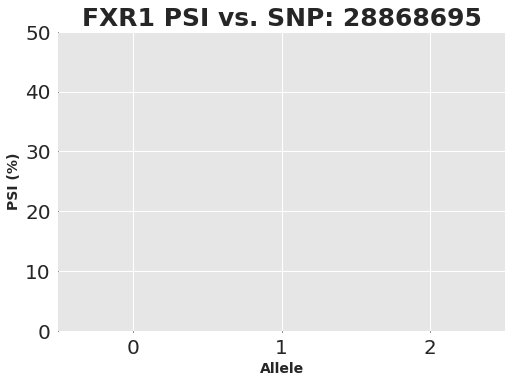

In [53]:
import seaborn as sns



flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_style('darkgrid',{"axes.facecolor": "0.9",
                          'axes.grid' : True,
                          'grid.linestyle': u'-',
                          'xtick.major.size': 1,
                          'ytick.major.size': 0.5,})

sns.swarmplot(locus_str['STR_' + str(STR) ].astype(int),locus_y["expr"],palette= sns.color_palette("Set2"),size=8)
plt.xlabel('Allele',fontsize=14,fontweight='bold')
plt.ylabel('PSI (%)',fontsize=14,fontweight='bold')
plt.title('FXR1 PSI vs. SNP: {}'.format(STR),fontsize=25,fontweight='bold')
ax = plt.gca()
ax.grid(True)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylim(0,50)
plt.show()